# Load modules

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Get the data

In [2]:
df = pd.read_csv('welddb/welddb.data', sep=r'\s+', header =None)

# EDA

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
columns = df.columns.to_list()
columns

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43]

No column naming discovered

## Rename the columns

In [5]:
original_44_columns = [
    "Carbon_conc_wt%", "Silicon_conc_wt%", "Manganese_conc_wt%", "Sulphur_conc_wt%", "Phosphorus_conc_wt%",
    "Nickel_conc_wt%", "Chromium_conc_wt%", "Molybdenum_conc_wt%", "Vanadium_conc_wt%", "Copper_conc_wt%",
    "Cobalt_conc_wt%", "Tungsten_conc_wt%", "Oxygen_ppm", "Titanium_ppm", "Nitrogen_ppm", "Aluminium_ppm",
    "Boron_ppm", "Niobium_ppm", "Tin_ppm", "Arsenic_ppm", "Antimony_ppm", "Current_A", "Voltage_V",
    "AC_DC", "Polarity", "Heat_input_kJ_per_mm", "Interpass_temp_C", "Weld_type",
    "PWHT_temp_C", "PWHT_time_h", "Yield_strength_MPa", "UTS_MPa", "Elongation_pct",
    "Reduction_area_pct", "Charpy_temp_C", "Charpy_toughness_J", "Hardness_kg_per_mm2",
    "FATT_50pct", "Primary_ferrite_pct", "Ferrite_with_second_phase_pct",
    "Acicular_ferrite_pct", "Martensite_pct", "Ferrite_with_carbide_pct", "Weld_ID"
]

In [6]:
df.columns = original_44_columns

In [7]:
df.head()

,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Sulphur_conc_wt%,Phosphorus_conc_wt%,Nickel_conc_wt%,Chromium_conc_wt%,Molybdenum_conc_wt%,Vanadium_conc_wt%,Copper_conc_wt%,Cobalt_conc_wt%,Tungsten_conc_wt%,Oxygen_ppm,Titanium_ppm,Nitrogen_ppm,Aluminium_ppm,Boron_ppm,Niobium_ppm,Tin_ppm,Arsenic_ppm,Antimony_ppm,Current_A,Voltage_V,AC_DC,Polarity,Heat_input_kJ_per_mm,Interpass_temp_C,Weld_type,PWHT_temp_C,PWHT_time_h,Yield_strength_MPa,UTS_MPa,Elongation_pct,Reduction_area_pct,Charpy_temp_C,Charpy_toughness_J,Hardness_kg_per_mm2,FATT_50pct,Primary_ferrite_pct,Ferrite_with_second_phase_pct,Acicular_ferrite_pct,Martensite_pct,Ferrite_with_carbide_pct,Weld_ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,170,21,DC,+,1.0,200,MMA,250,14,392,466,31.9,80.6,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,170,21,DC,+,1.0,200,MMA,0,0,N,N,N,N,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,170,21,DC,+,1.0,200,MMA,580,2,370,456,35.2,80.6,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,170,21,DC,+,1.0,200,MMA,250,14,413,498,31.2,80.6,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,170,21,DC,+,1.0,200,MMA,0,0,N,N,N,N,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Carbon_conc_wt%                1652 non-null   float64
 1   Silicon_conc_wt%               1652 non-null   float64
 2   Manganese_conc_wt%             1652 non-null   float64
 3   Sulphur_conc_wt%               1652 non-null   object 
 4   Phosphorus_conc_wt%            1652 non-null   object 
 5   Nickel_conc_wt%                1652 non-null   object 
 6   Chromium_conc_wt%              1652 non-null   object 
 7   Molybdenum_conc_wt%            1652 non-null   object 
 8   Vanadium_conc_wt%              1652 non-null   object 
 9   Copper_conc_wt%                1652 non-null   object 
 10  Cobalt_conc_wt%                1652 non-null   object 
 11  Tungsten_conc_wt%              1652 non-null   object 
 12  Oxygen_ppm                     1652 non-null   o

In [9]:
df.describe()

,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Heat_input_kJ_per_mm
count,1652.000000,1652.000000,1652.000000,1652.000000
mean,0.075521,0.328577,1.202821,1.700987
std,0.023898,0.112455,0.382137,1.298465
min,0.029000,0.040000,0.270000,0.600000
25%,0.061750,0.270000,0.940000,1.000000
50%,0.074000,0.320000,1.270000,1.000000
75%,0.086000,0.360000,1.440000,2.000000
max,0.180000,1.140000,2.250000,7.900000


Very few columns are numerical, let's convert. 

## Replace 'N' by NaN

In [10]:
df.replace('N', np.nan, inplace=True)

In [11]:
num_columns = df.columns.drop(['AC_DC', 'Polarity', 'Weld_type', 'Weld_ID'])

Try to convert:

In [12]:
df[num_columns] = df[num_columns].apply(pd.to_numeric)

ValueError: Unable to parse string "<0.002" at position 1197

String values discovered in numerical columns. (type '<...'). Let's evaluate the problem and convert to numerical what we can first

In [13]:
mask = df.apply(lambda col: col.astype(str).str.contains('<').any())
cols_with_lt = df.columns[mask]
print("Columns with < values:", list(cols_with_lt))


Columns with < values: ['Sulphur_conc_wt%', 'Molybdenum_conc_wt%', 'Vanadium_conc_wt%', 'Copper_conc_wt%', 'Cobalt_conc_wt%', 'Tungsten_conc_wt%', 'Titanium_ppm', 'Aluminium_ppm', 'Boron_ppm', 'Niobium_ppm', 'Tin_ppm', 'Arsenic_ppm', 'Antimony_ppm', 'Primary_ferrite_pct', 'Weld_ID']


In [14]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Carbon_conc_wt%                1652 non-null   float64
 1   Silicon_conc_wt%               1652 non-null   float64
 2   Manganese_conc_wt%             1652 non-null   float64
 3   Sulphur_conc_wt%               1648 non-null   object 
 4   Phosphorus_conc_wt%            1642 non-null   float64
 5   Nickel_conc_wt%                697 non-null    float64
 6   Chromium_conc_wt%              784 non-null    float64
 7   Molybdenum_conc_wt%            793 non-null    object 
 8   Vanadium_conc_wt%              928 non-null    object 
 9   Copper_conc_wt%                578 non-null    object 
 10  Cobalt_conc_wt%                129 non-null    object 
 11  Tungsten_conc_wt%              75 non-null     object 
 12  Oxygen_ppm                     1256 non-null   f

In [16]:
df.describe()

,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Phosphorus_conc_wt%,Nickel_conc_wt%,Chromium_conc_wt%,Oxygen_ppm,Current_A,Voltage_V,Heat_input_kJ_per_mm,PWHT_temp_C,PWHT_time_h,Yield_strength_MPa,UTS_MPa,Elongation_pct,Reduction_area_pct,Charpy_temp_C,Charpy_toughness_J,FATT_50pct,Ferrite_with_second_phase_pct,Acicular_ferrite_pct,Martensite_pct,Ferrite_with_carbide_pct
count,1652.000000,1652.000000,1652.000000,1642.000000,697.000000,784.000000,1256.000000,1404.000000,1404.000000,1652.000000,1639.000000,1639.000000,780.000000,738.000000,700.000000,705.000000,879.000000,879.00000,31.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.012952,0.415034,2.101273,441.967357,283.843661,27.607379,1.700987,304.674192,5.049652,508.557179,594.386314,26.275714,71.799858,-34.606371,87.68942,-31.096774,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.019627,0.786951,3.026548,147.483825,192.560955,12.555629,1.298465,285.498003,6.096034,92.865446,88.636238,4.895986,8.926551,34.738624,50.11670,43.644285,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.002000,0.000000,0.000000,132.000000,115.000000,11.500000,0.600000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.00000,-126.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.007000,0.000000,0.000000,370.000000,170.000000,21.000000,1.000000,0.000000,0.000000,443.000000,532.775000,22.800000,68.000000,-60.000000,38.00000,-62.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.010000,0.067000,0.530000,423.000000,170.000000,21.000000,1.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.00000,-15.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.014000,0.260000,2.300000,471.000000,300.000000,30.000000,2.000000,580.000000,10.000000,559.250000,647.000000,30.000000,78.000000,-17.500000,100.00000,5.000000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.250000,3.500000,10.200000,1650.000000,900.000000,75.360000,7.900000,760.000000,24.000000,920.000000,1151.000000,37.000000,83.000000,188.000000,270.00000,30.000000,100.000000,88.000000,30.000000,8.000000


In [17]:
df.head(7)

,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Sulphur_conc_wt%,Phosphorus_conc_wt%,Nickel_conc_wt%,Chromium_conc_wt%,Molybdenum_conc_wt%,Vanadium_conc_wt%,Copper_conc_wt%,Cobalt_conc_wt%,Tungsten_conc_wt%,Oxygen_ppm,Titanium_ppm,Nitrogen_ppm,Aluminium_ppm,Boron_ppm,Niobium_ppm,Tin_ppm,Arsenic_ppm,Antimony_ppm,Current_A,Voltage_V,AC_DC,Polarity,Heat_input_kJ_per_mm,Interpass_temp_C,Weld_type,PWHT_temp_C,PWHT_time_h,Yield_strength_MPa,UTS_MPa,Elongation_pct,Reduction_area_pct,Charpy_temp_C,Charpy_toughness_J,Hardness_kg_per_mm2,FATT_50pct,Primary_ferrite_pct,Ferrite_with_second_phase_pct,Acicular_ferrite_pct,Martensite_pct,Ferrite_with_carbide_pct,Weld_ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,250.0,14.0,392.0,466.0,31.9,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,580.0,2.0,370.0,456.0,35.2,80.6,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,250.0,14.0,413.0,498.0,31.2,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch
5,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,580.0,2.0,402.0,490.0,31.0,80.6,-44.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Bht
6,0.044,0.35,1.43,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,250.0,14.0,468.0,551.0,29.4,78.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Caw


## Deal with '<...' pattern

In [18]:
n = len(df)
for col in cols_with_lt:
    count_lt = df[col].str.contains('<').sum()
    count_nan = df[col].isna().sum()

    print(f"{col}: "
          f"{count_lt} values with '<' ({count_lt/n:.3f}), "
          f"{count_nan} NaN ({count_nan/n:.3f})")

Sulphur_conc_wt%: 7 values with '<' (0.004), 4 NaN (0.002)
Molybdenum_conc_wt%: 2 values with '<' (0.001), 859 NaN (0.520)
Vanadium_conc_wt%: 308 values with '<' (0.186), 724 NaN (0.438)
Copper_conc_wt%: 14 values with '<' (0.008), 1074 NaN (0.650)
Cobalt_conc_wt%: 21 values with '<' (0.013), 1523 NaN (0.922)
Tungsten_conc_wt%: 12 values with '<' (0.007), 1577 NaN (0.955)
Titanium_ppm: 70 values with '<' (0.042), 717 NaN (0.434)
Aluminium_ppm: 403 values with '<' (0.244), 747 NaN (0.452)
Boron_ppm: 419 values with '<' (0.254), 1148 NaN (0.695)
Niobium_ppm: 299 values with '<' (0.181), 900 NaN (0.545)
Tin_ppm: 5 values with '<' (0.003), 1356 NaN (0.821)
Arsenic_ppm: 8 values with '<' (0.005), 1418 NaN (0.858)
Antimony_ppm: 6 values with '<' (0.004), 1392 NaN (0.843)
Primary_ferrite_pct: 2 values with '<' (0.001), 1554 NaN (0.941)
Weld_ID: 19 values with '<' (0.012), 0 NaN (0.000)


In [19]:

def make_limit_value_and_flag(s: pd.Series):
    s_str = s.astype(str).str.strip()

    # flag: was reported as "<"
    censored = s_str.str.startswith('<')

    # extract the numeric part (works for "123", "0.01", "1e-3", and "<0.01")
    num = s_str.str.extract(r'<?\s*([0-9]*\.?[0-9]+(?:e-?\d+)?)', expand=False)
    value = pd.to_numeric(num, errors='coerce')  # float, NaN if not parseable

    return value, censored

# Apply to all columns that may contain "<"
for col in cols_with_lt:
    value, censored = make_limit_value_and_flag(df[col])
    df[f"{col}_value"] = value            # numeric (uses the limit itself)
    df[f"{col}_censored"] = censored      # True if it came from a "<" entry
    # original df[col] remains as-is (strings like "<0.01", "0.03", "N", ...)


Replace ```<a``` with ```a/2```

In [20]:
cols_expected_with_lt = [
    "Sulphur_conc_wt%", "Molybdenum_conc_wt%", "Vanadium_conc_wt%", "Copper_conc_wt%",
    "Cobalt_conc_wt%", "Tungsten_conc_wt%", "Titanium_ppm", "Aluminium_ppm",
    "Boron_ppm", "Niobium_ppm", "Tin_ppm", "Arsenic_ppm", "Antimony_ppm",
    "Primary_ferrite_pct"
]

def replace_lt_half(series):
    """
    Replace '<x' values with x/2, keep numeric values as-is,
    and leave NaN untouched for later imputation.
    """
    s = series.astype(str).str.strip()

    # Identify censored entries (starting with '<')
    censored_mask = s.str.startswith('<')

    # Extract numeric part (e.g., "<0.01" -> 0.01)
    extracted = s.str.extract(r'<\s*([0-9]*\.?[0-9]+(?:e-?\d+)?)', expand=False)
    extracted = pd.to_numeric(extracted, errors='coerce')

    # Create numeric version of the series
    result = pd.to_numeric(s.str.replace('<', '', regex=False), errors='coerce')

    # Replace censored values with half of the detection limit
    result[censored_mask] = extracted[censored_mask] / 2

    return result, censored_mask

# Apply the function to all relevant columns
for col in cols_expected_with_lt:
    df[col], df[col + "_censored"] = replace_lt_half(df[col])

Let's visualize

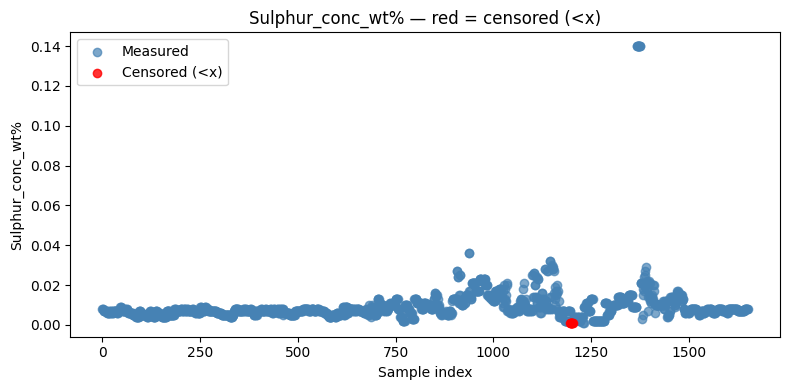

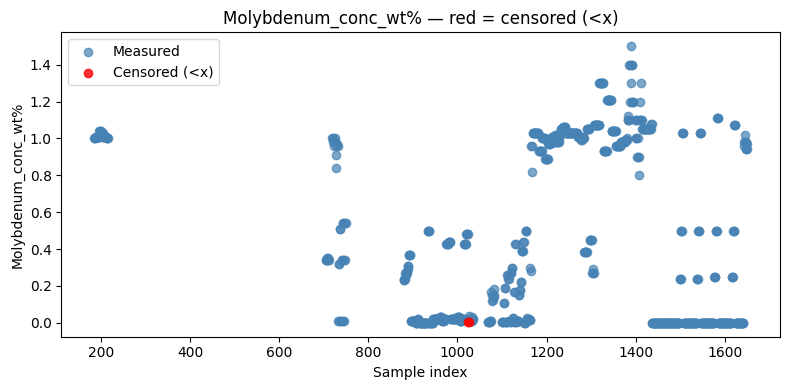

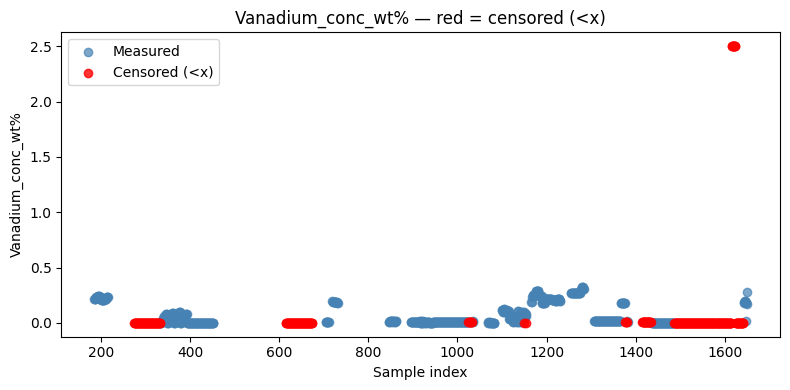

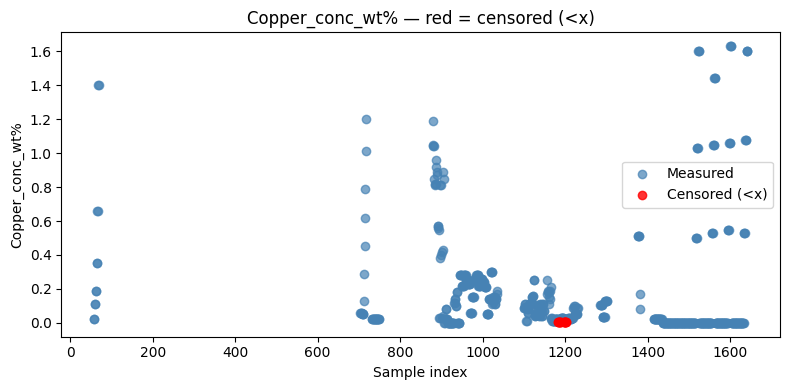

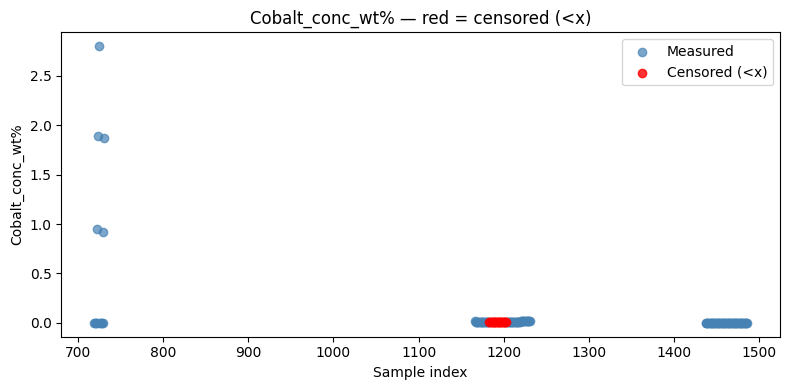

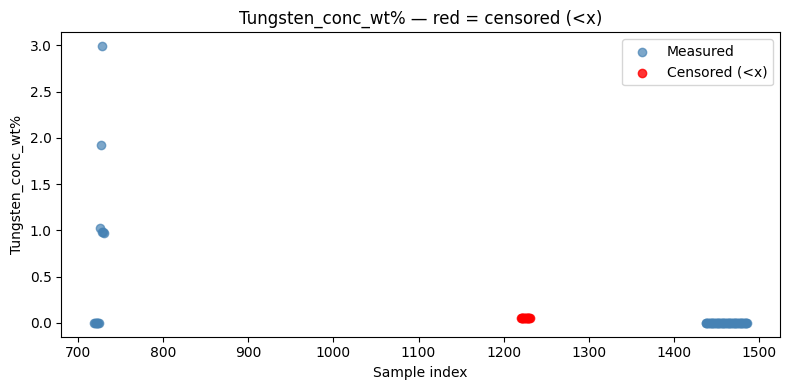

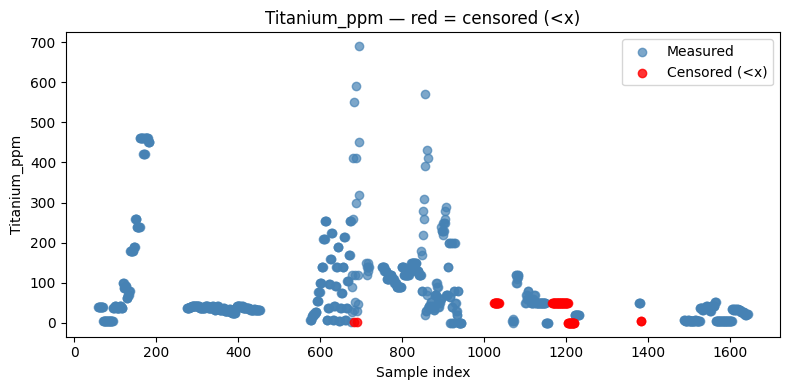

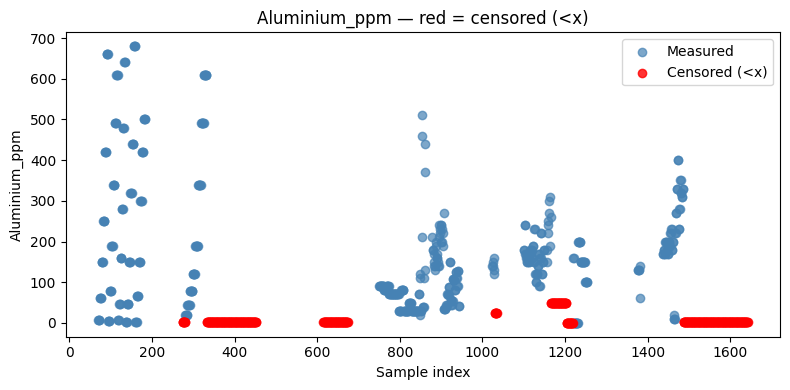

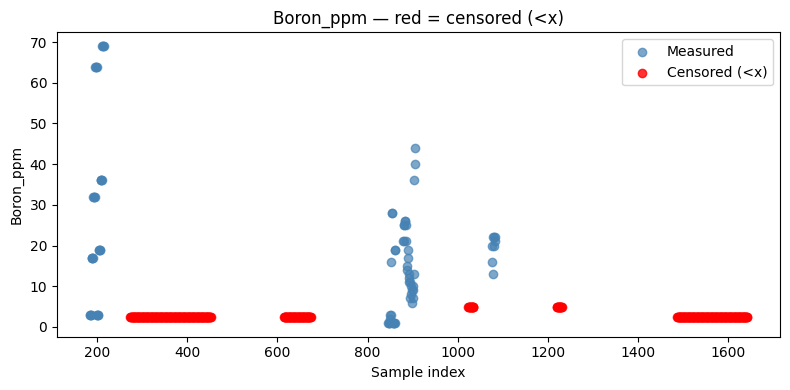

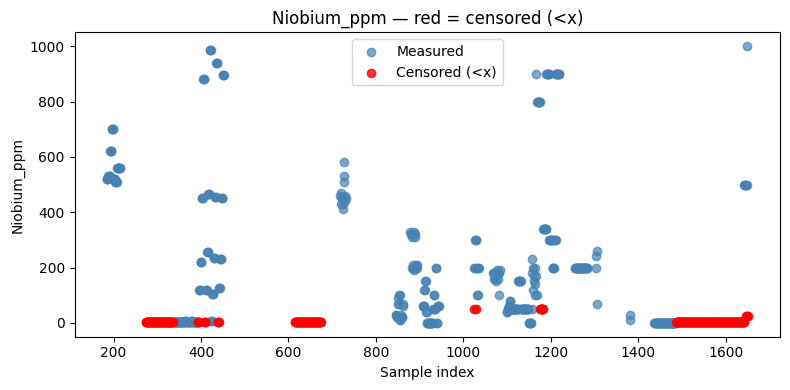

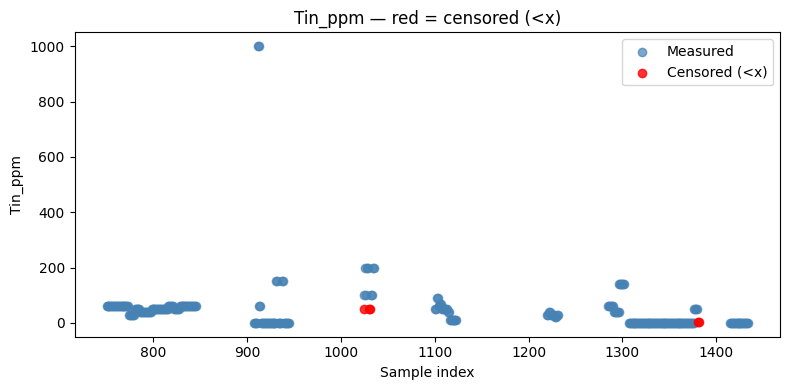

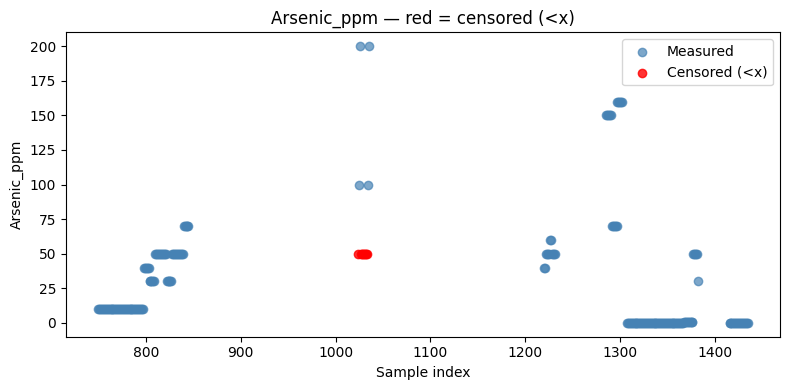

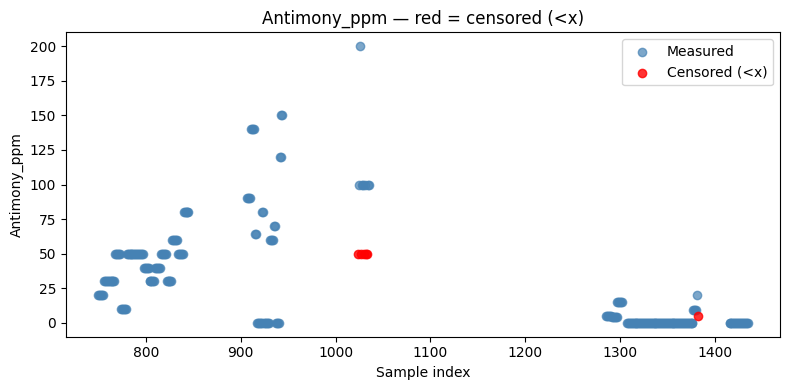

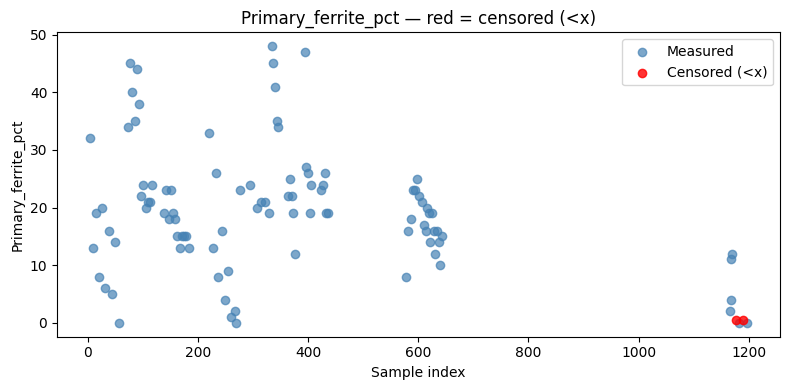

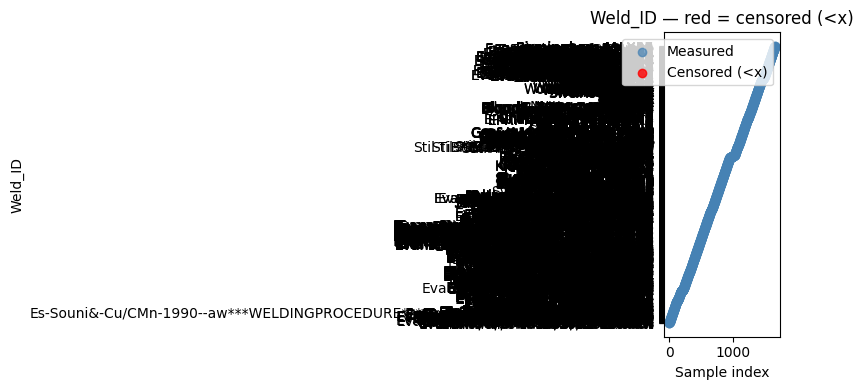

In [21]:

for col in cols_with_lt:
    val_col = f"{col}"
    cens_col = f"{col}_censored"

    plt.figure(figsize=(8, 4))
    
    plt.scatter(
        df.index[~df[cens_col]],
        df.loc[~df[cens_col], val_col],
        color='steelblue', label='Measured', alpha=0.7
    )

    plt.scatter(
        df.index[df[cens_col]],
        df.loc[df[cens_col], val_col],
        color='red', label='Censored (<x)', alpha=0.8
    )

    plt.title(f"{col} — red = censored (<x)")
    plt.xlabel("Sample index")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [22]:
for col in num_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Carbon_conc_wt%                1652 non-null   float64
 1   Silicon_conc_wt%               1652 non-null   float64
 2   Manganese_conc_wt%             1652 non-null   float64
 3   Sulphur_conc_wt%               1648 non-null   float64
 4   Phosphorus_conc_wt%            1642 non-null   float64
 5   Nickel_conc_wt%                697 non-null    float64
 6   Chromium_conc_wt%              784 non-null    float64
 7   Molybdenum_conc_wt%            793 non-null    float64
 8   Vanadium_conc_wt%              928 non-null    float64
 9   Copper_conc_wt%                578 non-null    float64
 10  Cobalt_conc_wt%                129 non-null    float64
 11  Tungsten_conc_wt%              75 non-null     float64
 12  Oxygen_ppm                     1256 non-null   f

In [24]:
df.describe()

,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Sulphur_conc_wt%,Phosphorus_conc_wt%,Nickel_conc_wt%,Chromium_conc_wt%,Molybdenum_conc_wt%,Vanadium_conc_wt%,Copper_conc_wt%,Cobalt_conc_wt%,Tungsten_conc_wt%,Oxygen_ppm,Titanium_ppm,Aluminium_ppm,Boron_ppm,Niobium_ppm,Tin_ppm,Arsenic_ppm,Antimony_ppm,Current_A,Voltage_V,Heat_input_kJ_per_mm,PWHT_temp_C,PWHT_time_h,Yield_strength_MPa,UTS_MPa,Elongation_pct,Reduction_area_pct,Charpy_temp_C,Charpy_toughness_J,FATT_50pct,Primary_ferrite_pct,Ferrite_with_second_phase_pct,Acicular_ferrite_pct,Martensite_pct,Ferrite_with_carbide_pct,Sulphur_conc_wt%_value,Molybdenum_conc_wt%_value,Vanadium_conc_wt%_value,Copper_conc_wt%_value,Cobalt_conc_wt%_value,Tungsten_conc_wt%_value,Titanium_ppm_value,Aluminium_ppm_value,Boron_ppm_value,Niobium_ppm_value,Tin_ppm_value,Arsenic_ppm_value,Antimony_ppm_value,Primary_ferrite_pct_value,Weld_ID_value
count,1652.000000,1652.000000,1652.000000,1648.000000,1642.000000,697.000000,784.000000,793.000000,928.000000,578.000000,129.000000,75.000000,1256.000000,935.000000,905.000000,504.000000,752.000000,296.000000,234.000000,260.000000,1404.000000,1404.000000,1652.000000,1639.000000,1639.000000,780.000000,738.000000,700.000000,705.000000,879.000000,879.00000,31.000000,98.000000,90.000000,90.000000,89.000000,89.000000,1648.000000,793.000000,928.000000,578.000000,129.000000,75.000000,935.000000,905.000000,504.000000,752.000000,296.000000,234.000000,260.000000,98.000000,1574.000000
mean,0.075521,0.328577,1.202821,0.009525,0.012952,0.415034,2.101273,0.479159,0.072889,0.172042,0.070209,0.126267,441.967357,77.874417,99.134431,5.681548,132.381649,41.630446,29.335325,28.475308,283.843661,27.607379,1.700987,304.674192,5.049652,508.557179,594.386314,26.275714,71.799858,-34.606371,87.68942,-31.096774,19.163265,25.955556,52.833333,0.337079,0.438202,0.009529,0.479172,0.097379,0.172163,0.071023,0.134267,80.564342,102.347227,7.878968,134.035904,42.170986,31.044726,29.456077,19.173469,2606.930305
std,0.023898,0.112455,0.382137,0.011229,0.019627,0.786951,3.026548,0.477416,0.255093,0.322995,0.353881,0.455942,147.483825,97.214737,142.576702,10.129542,229.421708,88.899032,41.175311,35.565904,192.560955,12.555629,1.298465,285.498003,6.096034,92.865446,88.636238,4.895986,8.926551,34.738624,50.11670,43.644285,10.999947,21.283486,23.483798,3.179994,1.397685,0.011226,0.477404,0.492889,0.322933,0.353735,0.454958,97.086353,141.474043,9.542165,228.686640,89.075058,43.003026,36.782796,10.982672,9568.814945
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000,0.004000,1.000000,0.000000,0.000000,0.003000,0.000000,115.000000,11.500000,0.600000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.00000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,1.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.250000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000250,0.000000,0.000000,0.000000,370.000000,30.000000,2.500000,2.500000,2.500000,0.008000,0.030500,0.008000,170.000000,21.000000,1.000000,0.000000,0.000000,443.000000,532.775000,22.800000,68.000000,-60.000000,38.00000,-62.000000,13.000000,9.000000,35.500000,0.000000,0.000000,0.006000,0.000000,0.000500,0.000000,0.000000,0.000000,30.000000,5.000000,5.000000,5.000000,0.008000,0.030500,0.008000,13.000000,1978.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.005000,0.030000,0.005000,0.000000,423.000000,42.000000,42.000000,2.500000,5.000000,40.000000,10.000000,15.000000,170.000000,21.000000,1.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.00000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000,0.007000,0.340000,0.009500,0.030000,0.005000,0.000000,42.000000,44.000000,5.000000,5.000000,40.000000,10.000000,15.000000,19.000000,1990.000000
75%,0.086000,0.3600

## Deal with other str in numeric columns

In [25]:
obj_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", obj_cols.tolist())

def show_non_numeric_examples(s, k=10):
    s = s.dropna().astype(str).str.strip()
    # numeric-like patterns: numbers, optional leading "<", optional scientific notation, simple ranges a-b
    numeric_like = r'^<?\s*\d*\.?\d+(?:e-?\d+)?(?:\s*[-–]\s*\d*\.?\d+(?:e-?\d+)?)?$'
    bad = s[~s.str.match(numeric_like, na=False)]
    return bad.value_counts().head(k)

for col in obj_cols:
    print(f"\n--- {col} ---")
    print(show_non_numeric_examples(df[col], k=10))


Object columns: ['Nitrogen_ppm', 'AC_DC', 'Polarity', 'Interpass_temp_C', 'Weld_type', 'Hardness_kg_per_mm2', 'Weld_ID']

--- Nitrogen_ppm ---
Nitrogen_ppm
66totndres    11
67tot33res     7
61tot34res     7
54tot24res     7
52tot18res     7
50tot17res     7
48tot18res     7
54totndres     6
Name: count, dtype: int64

--- AC_DC ---
AC_DC
DC    1395
AC      42
Name: count, dtype: int64

--- Polarity ---
Polarity
+    1451
-       7
Name: count, dtype: int64

--- Interpass_temp_C ---
Series([], Name: count, dtype: int64)

--- Weld_type ---
Weld_type
MMA      1140
SA        261
FCA        87
TSA        87
ShMA       40
NGSAW      18
NGGMA       7
SAA         4
GTAA        4
GMAA        4
Name: count, dtype: int64

--- Hardness_kg_per_mm2 ---
Hardness_kg_per_mm2
212Hv10      2
249Hv10      2
226Hv10      2
224Hv10      2
203(Hv30)    2
157(Hv30)    2
144(Hv30)    2
154(Hv30)    2
237Hv10      1
234Hv10      1
Name: count, dtype: int64

--- Weld_ID ---
Weld_ID
Pat-1981-S6/BX400      5
Pat-19

In [26]:
print(df['Interpass_temp_C'].value_counts())

Interpass_temp_C
200        1064
250         171
300         118
150         102
175          52
100          40
150-200      38
210          20
177          16
107           8
125           6
225           5
140           4
20            4
240           4
Name: count, dtype: int64


### Clean Nitrogen_ppm

In [27]:
# Clean Nitrogen_ppm (remove alphanumeric junk like "67tot33res")

nitro = df["Nitrogen_ppm"].astype(str).str.strip()

# Replace any value containing letters with NaN
mask_bad = nitro.str.contains(r"[A-Za-z]", na=False)
df.loc[mask_bad, "Nitrogen_ppm"] = np.nan

df["Nitrogen_ppm"] = pd.to_numeric(df["Nitrogen_ppm"])

print(df["Nitrogen_ppm"].describe())


count    1183.000000
mean      113.378698
std        95.902889
min        21.000000
25%        72.000000
50%        83.000000
75%       106.500000
max       552.000000
Name: Nitrogen_ppm, dtype: float64


### Clean Interpass_temp_C and Hardness_kg_per_mm2

In [28]:

# Interpass_temp_C 
temp = df["Interpass_temp_C"].astype(str).str.strip().str.replace('–','-', regex=False)

# Handle ranges like "150-200" -> midpoint
mask_range = temp.str.match(r'^\d*\.?\d+\s*-\s*\d*\.?\d+$')
ab = temp.loc[mask_range].str.extract(r'(\d*\.?\d+)\s*-\s*(\d*\.?\d+)').astype(float)
mid = ab.mean(axis=1)

# Coerce the rest to numeric
temp_num = pd.to_numeric(temp,errors='coerce')

# Replace ranges by their midpoints
temp_num.loc[mask_range] = mid

# Assign back
df["Interpass_temp_C"] = temp_num

# Hardness_kg_per_mm2
hardness = df["Hardness_kg_per_mm2"].astype(str).str.strip()

# Extract first numeric value (before or around "Hv" / "(Hv...)")
num = hardness.str.extract(r'([0-9]*\.?[0-9]+)')
df["Hardness_kg_per_mm2"] = pd.to_numeric(num[0], errors="coerce")



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Carbon_conc_wt%                1652 non-null   float64
 1   Silicon_conc_wt%               1652 non-null   float64
 2   Manganese_conc_wt%             1652 non-null   float64
 3   Sulphur_conc_wt%               1648 non-null   float64
 4   Phosphorus_conc_wt%            1642 non-null   float64
 5   Nickel_conc_wt%                697 non-null    float64
 6   Chromium_conc_wt%              784 non-null    float64
 7   Molybdenum_conc_wt%            793 non-null    float64
 8   Vanadium_conc_wt%              928 non-null    float64
 9   Copper_conc_wt%                578 non-null    float64
 10  Cobalt_conc_wt%                129 non-null    float64
 11  Tungsten_conc_wt%              75 non-null     float64
 12  Oxygen_ppm                     1256 non-null   f

In [30]:
df.describe()

,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Sulphur_conc_wt%,Phosphorus_conc_wt%,Nickel_conc_wt%,Chromium_conc_wt%,Molybdenum_conc_wt%,Vanadium_conc_wt%,Copper_conc_wt%,Cobalt_conc_wt%,Tungsten_conc_wt%,Oxygen_ppm,Titanium_ppm,Nitrogen_ppm,Aluminium_ppm,Boron_ppm,Niobium_ppm,Tin_ppm,Arsenic_ppm,Antimony_ppm,Current_A,Voltage_V,Heat_input_kJ_per_mm,Interpass_temp_C,PWHT_temp_C,PWHT_time_h,Yield_strength_MPa,UTS_MPa,Elongation_pct,Reduction_area_pct,Charpy_temp_C,Charpy_toughness_J,Hardness_kg_per_mm2,FATT_50pct,Primary_ferrite_pct,Ferrite_with_second_phase_pct,Acicular_ferrite_pct,Martensite_pct,Ferrite_with_carbide_pct,Sulphur_conc_wt%_value,Molybdenum_conc_wt%_value,Vanadium_conc_wt%_value,Copper_conc_wt%_value,Cobalt_conc_wt%_value,Tungsten_conc_wt%_value,Titanium_ppm_value,Aluminium_ppm_value,Boron_ppm_value,Niobium_ppm_value,Tin_ppm_value,Arsenic_ppm_value,Antimony_ppm_value,Primary_ferrite_pct_value,Weld_ID_value
count,1652.000000,1652.000000,1652.000000,1648.000000,1642.000000,697.000000,784.000000,793.000000,928.000000,578.000000,129.000000,75.000000,1256.000000,935.000000,1183.000000,905.000000,504.000000,752.000000,296.000000,234.000000,260.000000,1404.000000,1404.000000,1652.000000,1652.000000,1639.000000,1639.000000,780.000000,738.000000,700.000000,705.000000,879.000000,879.00000,138.000000,31.000000,98.000000,90.000000,90.000000,89.000000,89.000000,1648.000000,793.000000,928.000000,578.000000,129.000000,75.000000,935.000000,905.000000,504.000000,752.000000,296.000000,234.000000,260.000000,98.000000,1574.000000
mean,0.075521,0.328577,1.202821,0.009525,0.012952,0.415034,2.101273,0.479159,0.072889,0.172042,0.070209,0.126267,441.967357,77.874417,113.378698,99.134431,5.681548,132.381649,41.630446,29.335325,28.475308,283.843661,27.607379,1.700987,204.214891,304.674192,5.049652,508.557179,594.386314,26.275714,71.799858,-34.606371,87.68942,226.905797,-31.096774,19.163265,25.955556,52.833333,0.337079,0.438202,0.009529,0.479172,0.097379,0.172163,0.071023,0.134267,80.564342,102.347227,7.878968,134.035904,42.170986,31.044726,29.456077,19.173469,2606.930305
std,0.023898,0.112455,0.382137,0.011229,0.019627,0.786951,3.026548,0.477416,0.255093,0.322995,0.353881,0.455942,147.483825,97.214737,95.902889,142.576702,10.129542,229.421708,88.899032,41.175311,35.565904,192.560955,12.555629,1.298465,39.349132,285.498003,6.096034,92.865446,88.636238,4.895986,8.926551,34.738624,50.11670,57.748370,43.644285,10.999947,21.283486,23.483798,3.179994,1.397685,0.011226,0.477404,0.492889,0.322933,0.353735,0.454958,97.086353,141.474043,9.542165,228.686640,89.075058,43.003026,36.782796,10.982672,9568.814945
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000,21.000000,0.004000,1.000000,0.000000,0.000000,0.003000,0.000000,115.000000,11.500000,0.600000,20.000000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.00000,143.000000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,1.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.250000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000250,0.000000,0.000000,0.000000,370.000000,30.000000,72.000000,2.500000,2.500000,2.500000,0.008000,0.030500,0.008000,170.000000,21.000000,1.000000,200.000000,0.000000,0.000000,443.000000,532.775000,22.800000,68.000000,-60.000000,38.00000,194.500000,-62.000000,13.000000,9.000000,35.500000,0.000000,0.000000,0.006000,0.000000,0.000500,0.000000,0.000000,0.000000,30.000000,5.000000,5.000000,5.000000,0.008000,0.030500,0.008000,13.000000,1978.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.005000,0.030000,0.005000,0.000000,423.000000,42.000000,83.000000,42.000000,2.500000,5.000000,40.000000,10.000000,15.000000,170.000000,21.000000,1.000000,200.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,

In [31]:
df_clean = df[[col for col in df.columns 
               if not any(x in col for x in ["_censored", "_value", "Weld_ID"])]] 

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Carbon_conc_wt%                1652 non-null   float64
 1   Silicon_conc_wt%               1652 non-null   float64
 2   Manganese_conc_wt%             1652 non-null   float64
 3   Sulphur_conc_wt%               1648 non-null   float64
 4   Phosphorus_conc_wt%            1642 non-null   float64
 5   Nickel_conc_wt%                697 non-null    float64
 6   Chromium_conc_wt%              784 non-null    float64
 7   Molybdenum_conc_wt%            793 non-null    float64
 8   Vanadium_conc_wt%              928 non-null    float64
 9   Copper_conc_wt%                578 non-null    float64
 10  Cobalt_conc_wt%                129 non-null    float64
 11  Tungsten_conc_wt%              75 non-null     float64
 12  Oxygen_ppm                     1256 non-null   f

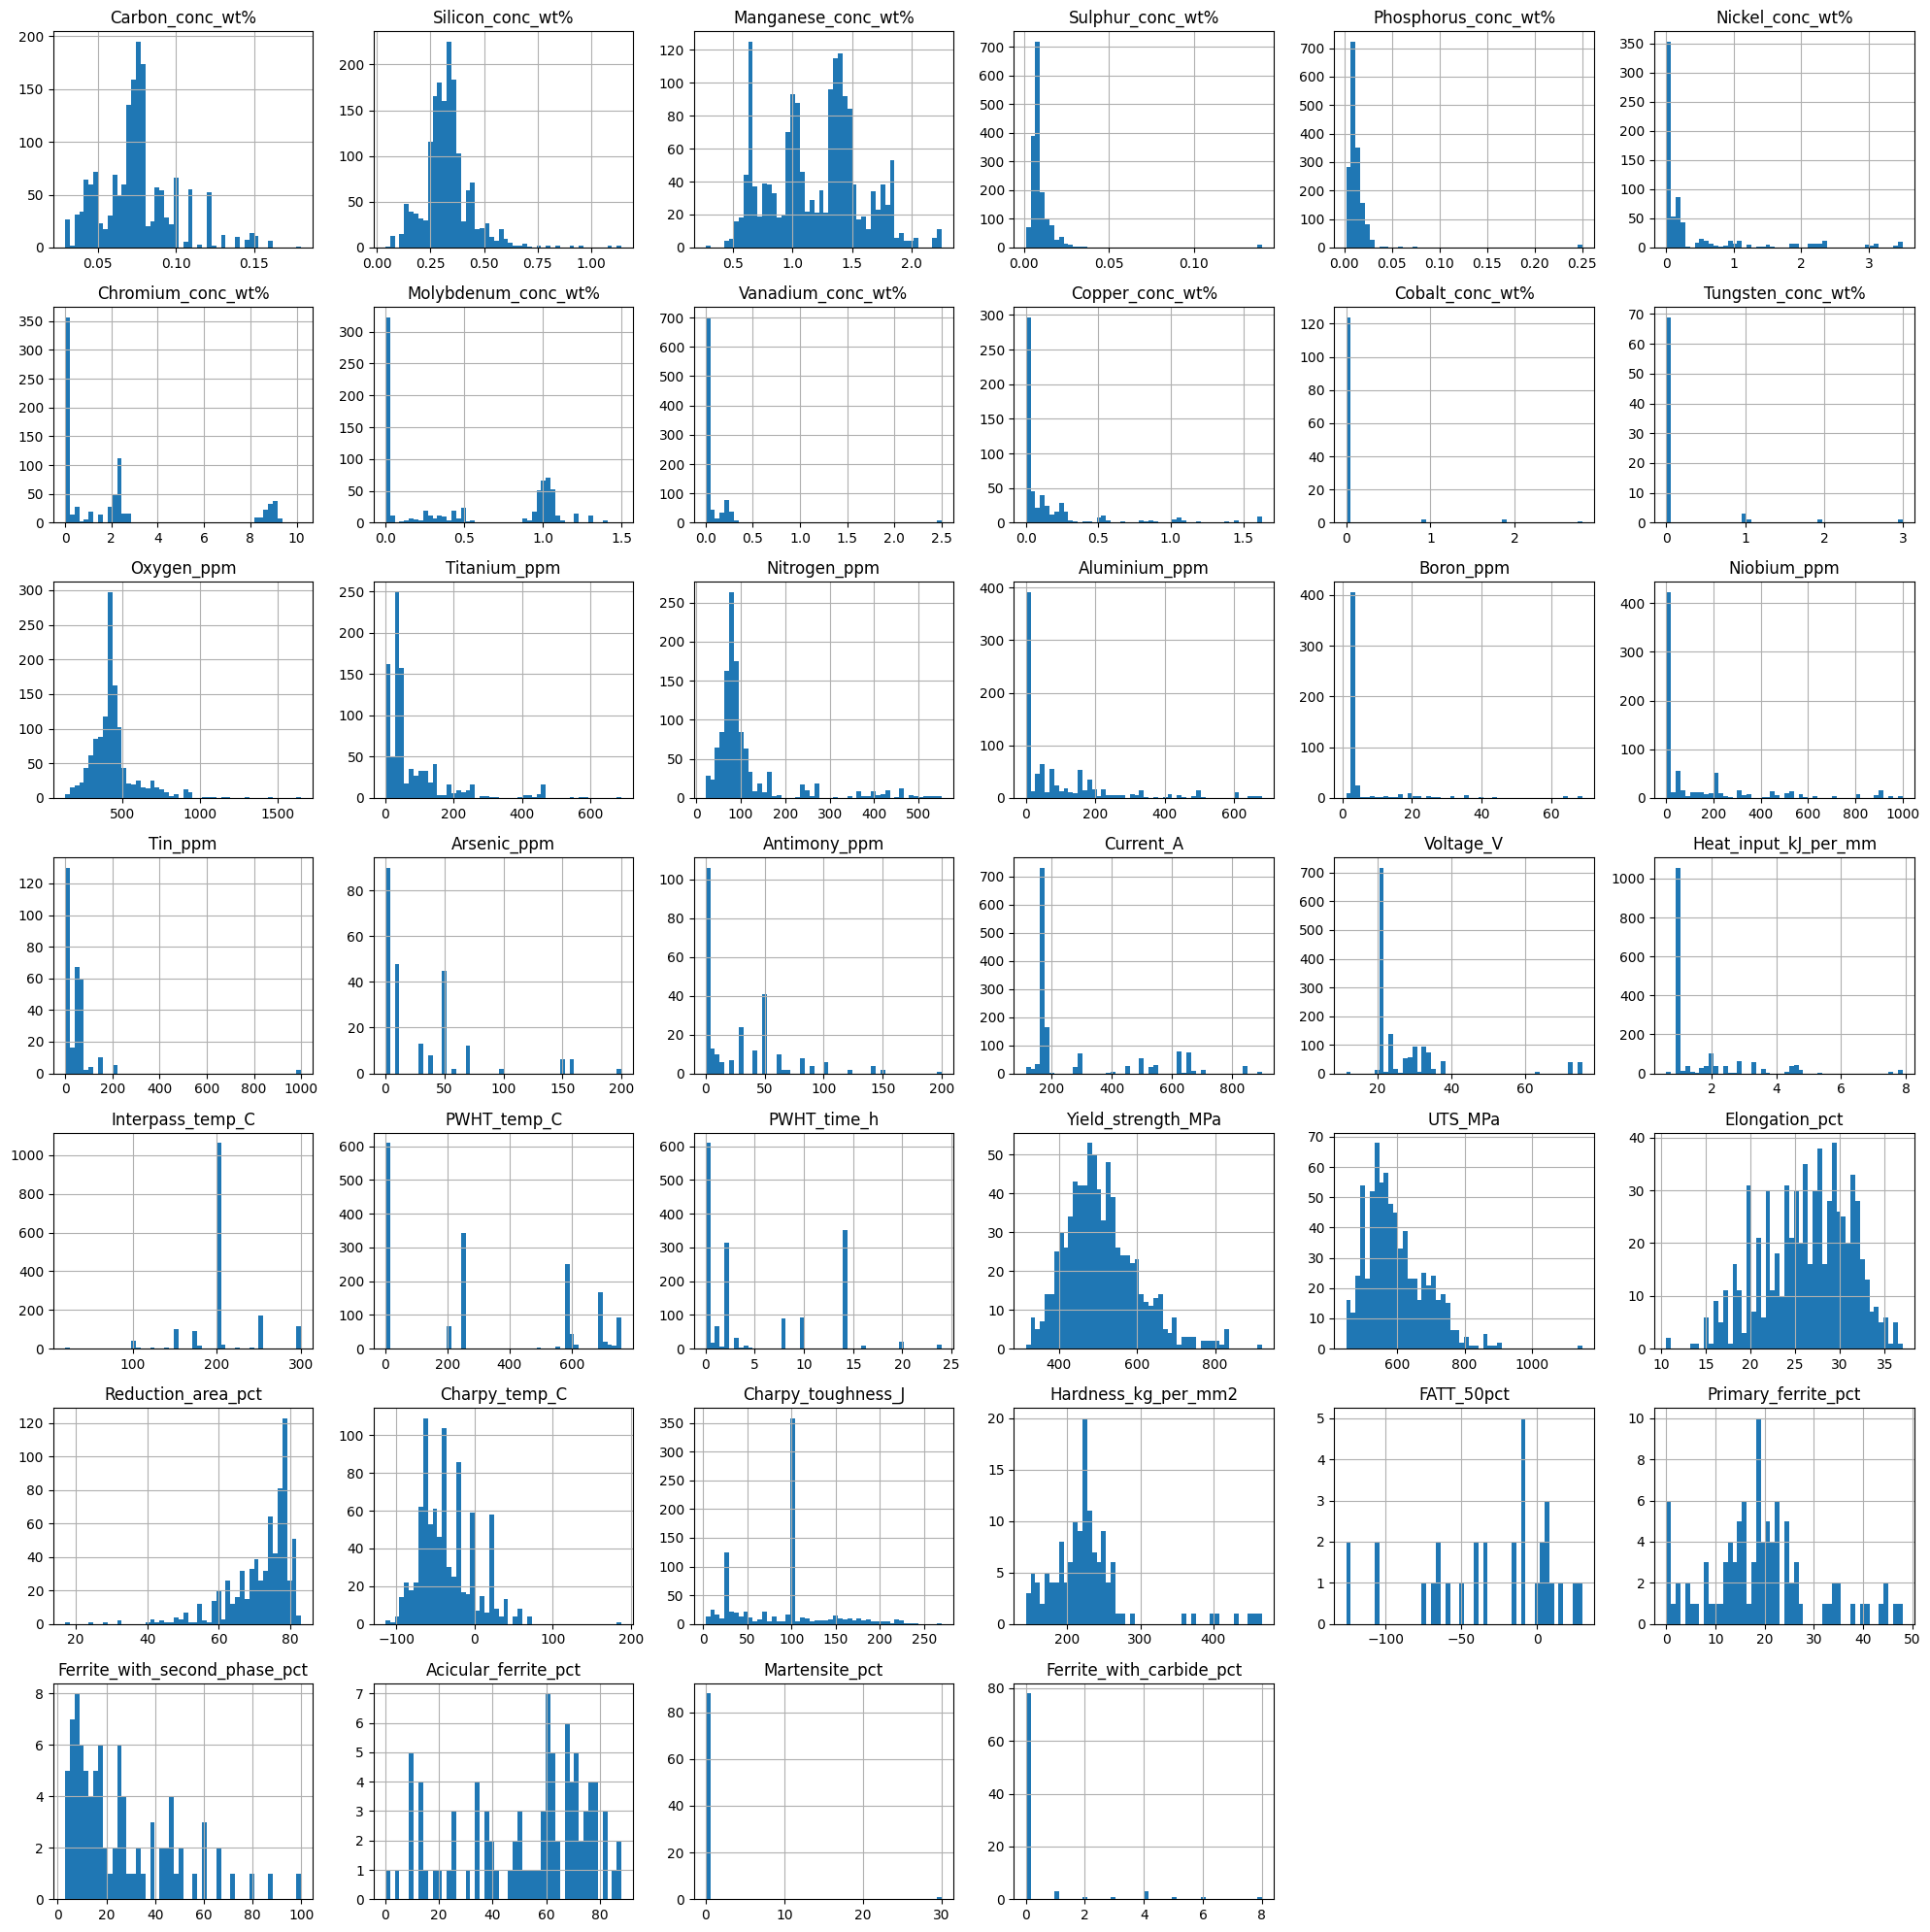

In [33]:
df_clean.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

## Keep only relevant columns (not too much of Nan)

In [34]:
keep_cols = [c for c in df_clean.columns
             if df_clean[c].isna().mean() <= 0.7]
df_clean = df_clean[keep_cols]

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carbon_conc_wt%       1652 non-null   float64
 1   Silicon_conc_wt%      1652 non-null   float64
 2   Manganese_conc_wt%    1652 non-null   float64
 3   Sulphur_conc_wt%      1648 non-null   float64
 4   Phosphorus_conc_wt%   1642 non-null   float64
 5   Nickel_conc_wt%       697 non-null    float64
 6   Chromium_conc_wt%     784 non-null    float64
 7   Molybdenum_conc_wt%   793 non-null    float64
 8   Vanadium_conc_wt%     928 non-null    float64
 9   Copper_conc_wt%       578 non-null    float64
 10  Oxygen_ppm            1256 non-null   float64
 11  Titanium_ppm          935 non-null    float64
 12  Nitrogen_ppm          1183 non-null   float64
 13  Aluminium_ppm         905 non-null    float64
 14  Boron_ppm             504 non-null    float64
 15  Niobium_ppm          

## Categorical to one hot

In [36]:
categorical_cols = ["AC_DC", "Polarity", "Weld_type"]
df_clean_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=False)
print("Columns after one-hot encoding:", len(df_clean_encoded.columns))
df_clean_encoded.head(7)

Columns after one-hot encoding: 43


,Carbon_conc_wt%,Silicon_conc_wt%,Manganese_conc_wt%,Sulphur_conc_wt%,Phosphorus_conc_wt%,Nickel_conc_wt%,Chromium_conc_wt%,Molybdenum_conc_wt%,Vanadium_conc_wt%,Copper_conc_wt%,Oxygen_ppm,Titanium_ppm,Nitrogen_ppm,Aluminium_ppm,Boron_ppm,Niobium_ppm,Current_A,Voltage_V,Heat_input_kJ_per_mm,Interpass_temp_C,PWHT_temp_C,PWHT_time_h,Yield_strength_MPa,UTS_MPa,Elongation_pct,Reduction_area_pct,Charpy_temp_C,Charpy_toughness_J,AC_DC_AC,AC_DC_DC,Polarity_+,Polarity_-,Polarity_0,Weld_type_FCA,Weld_type_GMAA,Weld_type_GTAA,Weld_type_MMA,Weld_type_NGGMA,Weld_type_NGSAW,Weld_type_SA,Weld_type_SAA,Weld_type_ShMA,Weld_type_TSA
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,250.0,14.0,392.0,466.0,31.9,80.6,NaN,NaN,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,0.0,0.0,NaN,NaN,NaN,NaN,-28.0,100.0,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,580.0,2.0,370.0,456.0,35.2,80.6,-38.0,100.0,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,250.0,14.0,413.0,498.0,31.2,80.6,NaN,NaN,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,0.0,0.0,NaN,NaN,NaN,NaN,-48.0,100.0,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
5,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,580.0,2.0,402.0,490.0,31.0,80.6,-44.0,100.0,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
6,0.044,0.35,1.43,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,1.0,200.0,250.0,14.0,468.0,551.0,29.4,78.7,NaN,NaN,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False


## Impute Median

In [37]:

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(df_clean_encoded)
df_clean_imputed = pd.DataFrame(X, columns=df_clean_encoded.columns)


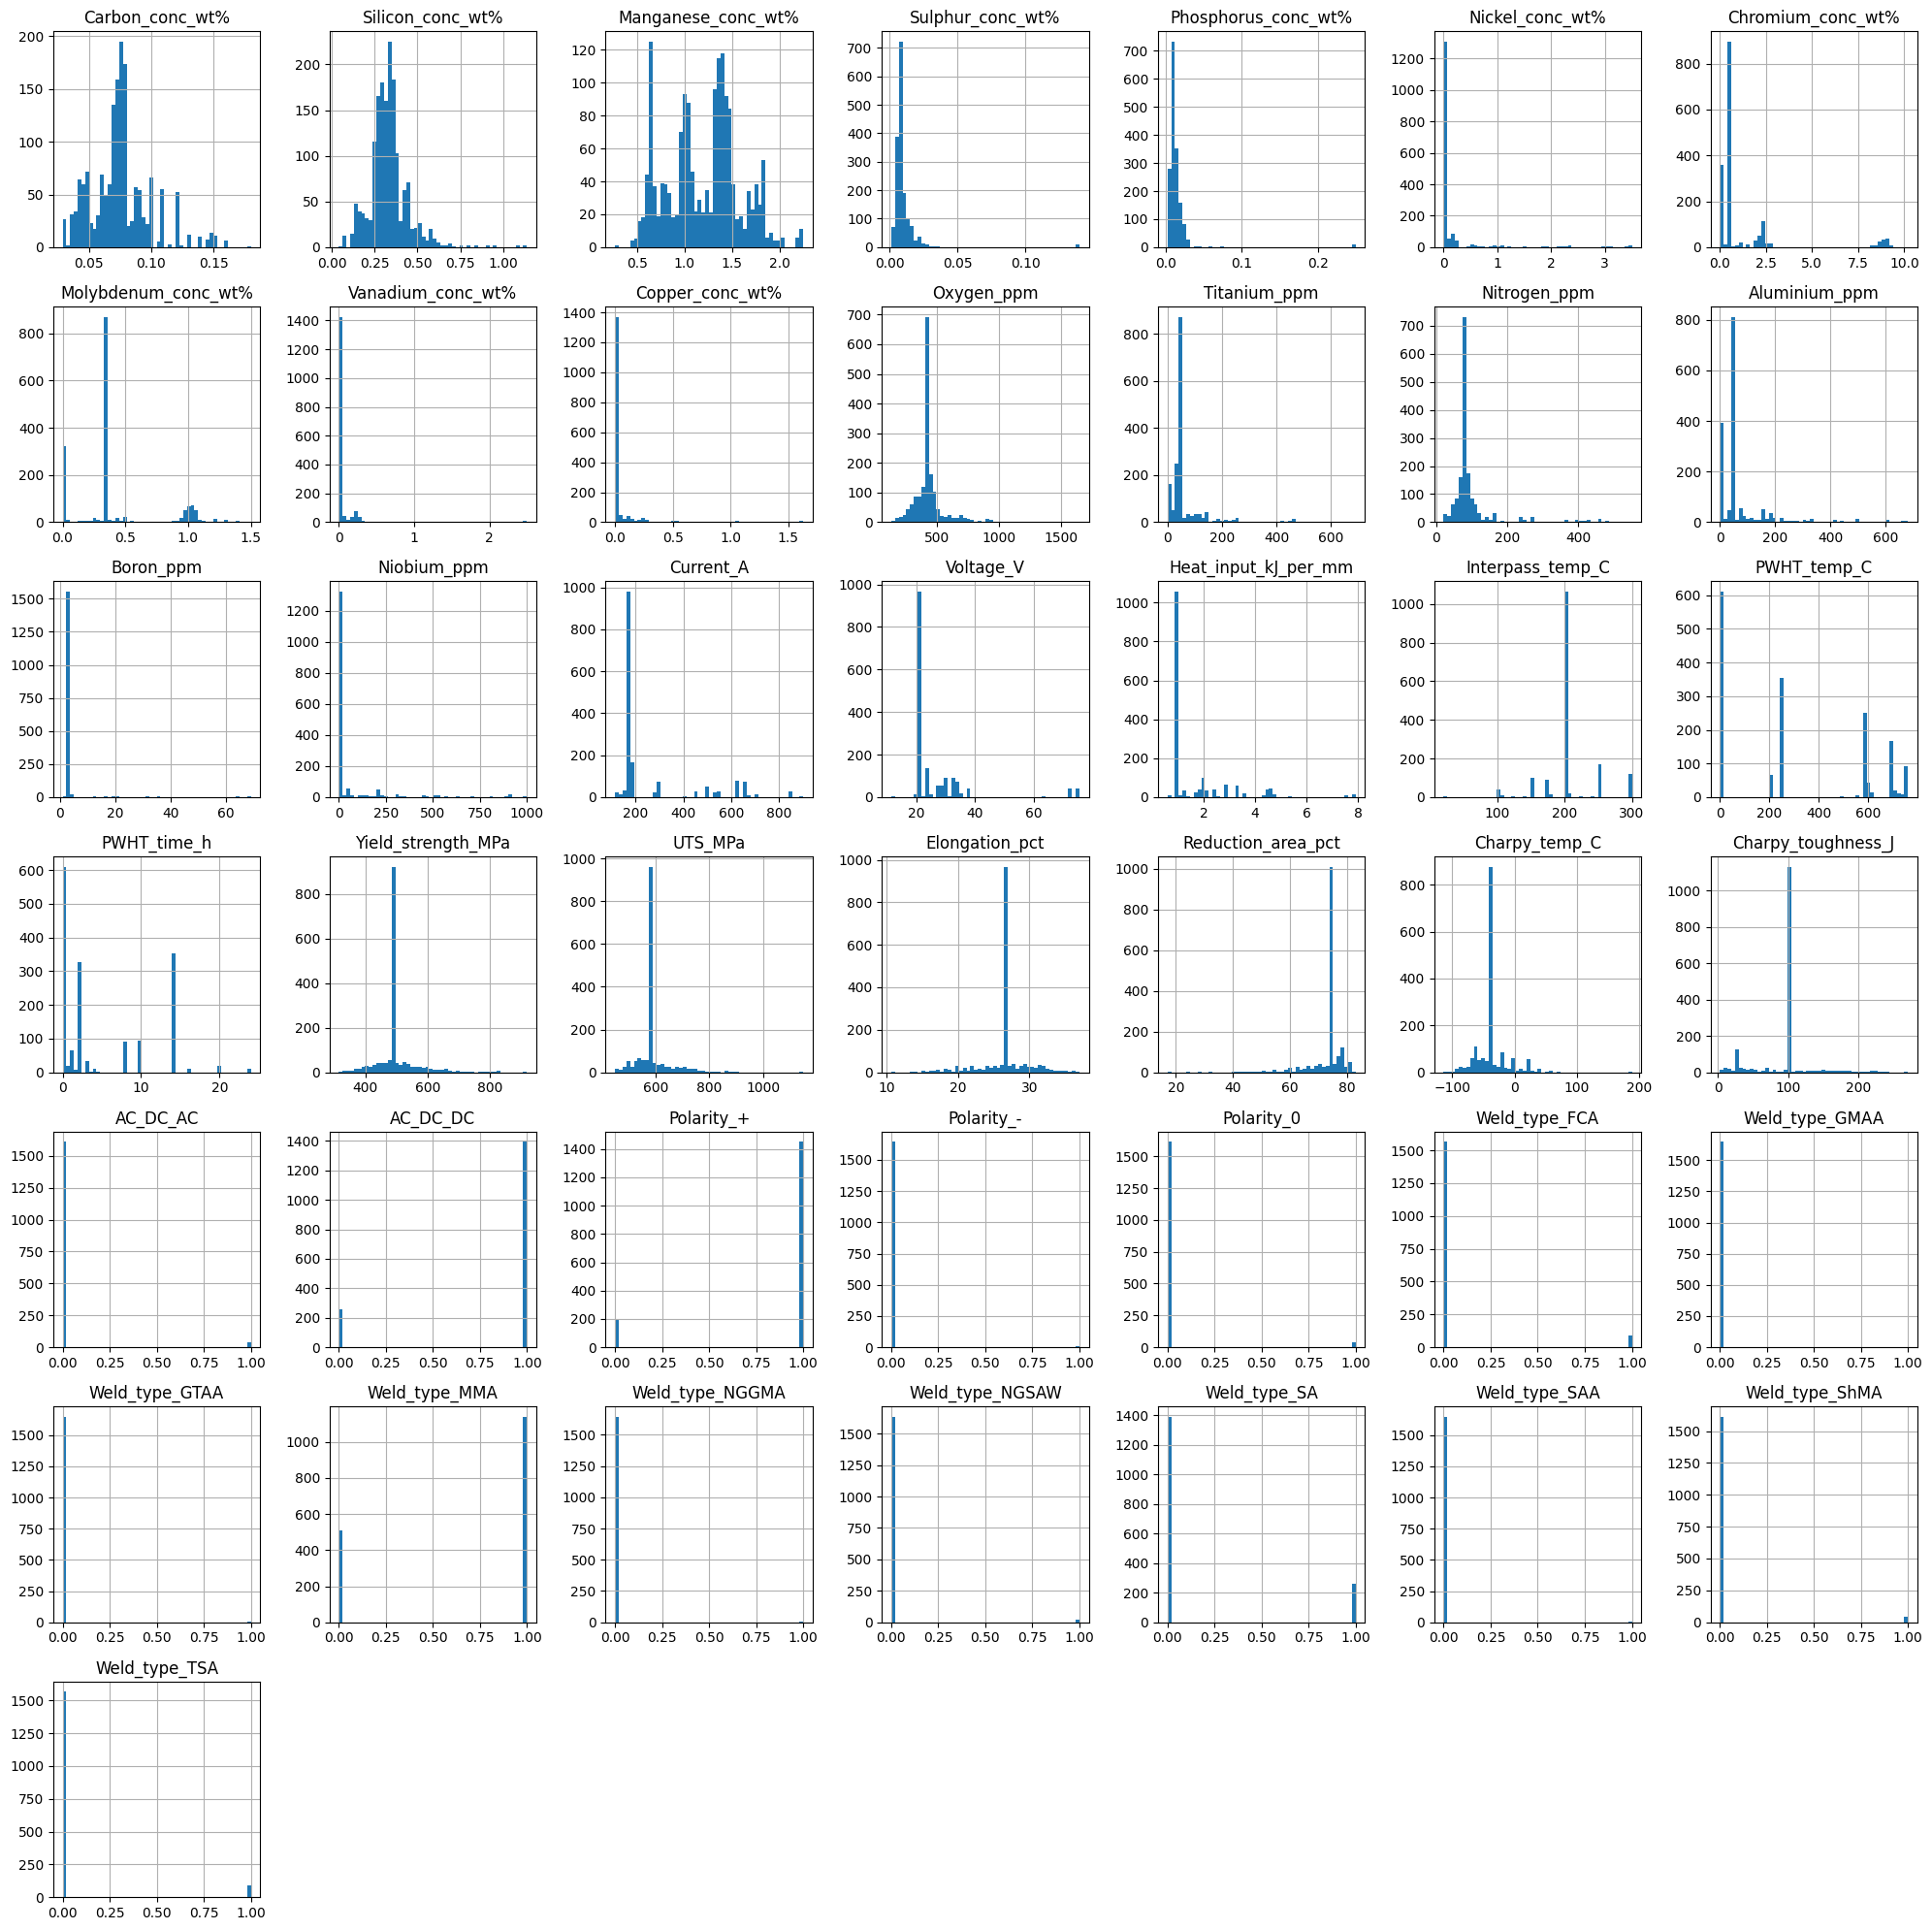

In [38]:
df_clean_imputed.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

## Scale

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_imputed)
df_scaled = pd.DataFrame(X_scaled, columns=df_clean_imputed.columns)


# PCA, corr

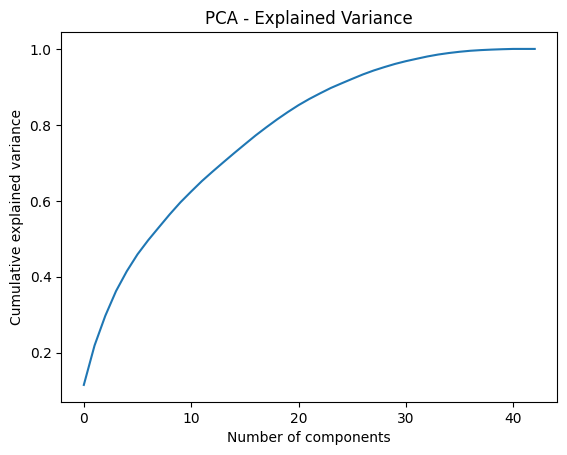

Explained variance (first 5 components):
[0.11511878 0.10392428 0.07810929 0.06508441 0.05218959]


In [42]:


pca = PCA()
X_pca = pca.fit_transform(df_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA - Explained Variance")
plt.show()

print("Explained variance (first 5 components):")
print(pca.explained_variance_ratio_[:5])


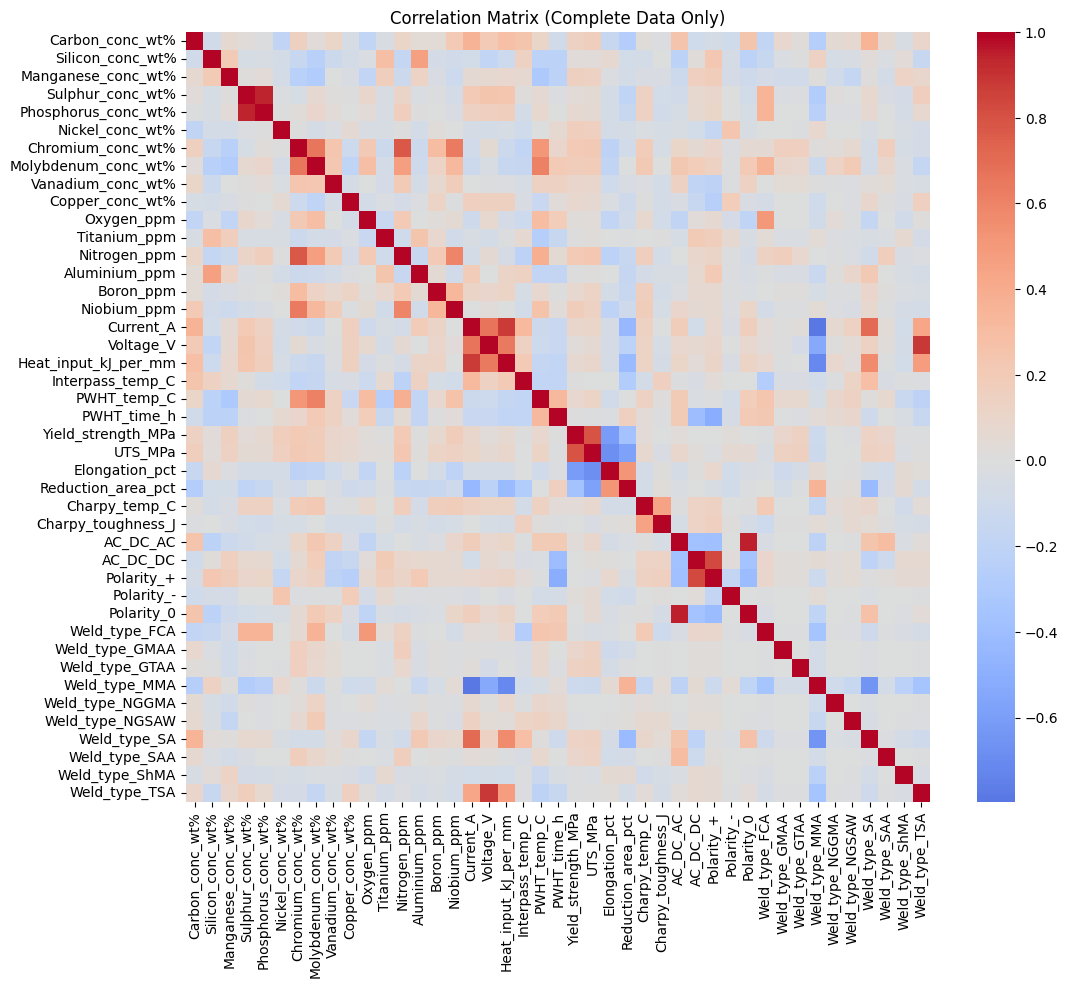

In [46]:
corr = df_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Complete Data Only)")
plt.show()


Explained variance ratio: [0.11511878 0.10392428]
Cumulative variance: 0.21904305388152734


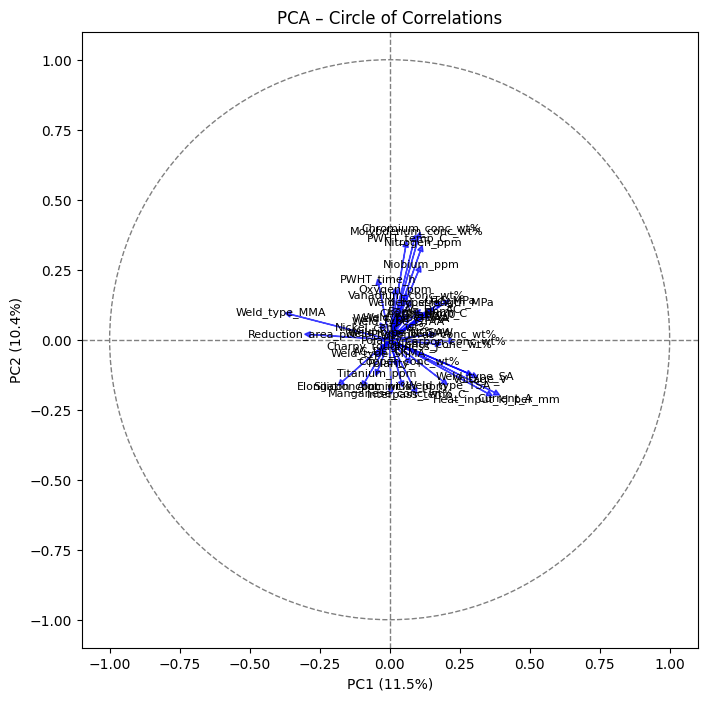

In [47]:

# --- Fit PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# --- Variance explained ---
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", np.sum(pca.explained_variance_ratio_[:2]))

# --- Circle of correlations ---
pcs = pca.components_

plt.figure(figsize=(8, 8))

# Draw circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Plot arrows
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, color='blue', alpha=0.7)
    plt.text(x*1.1, y*1.1, df_scaled.columns[i], fontsize=8, ha='center', va='center')

# Axis settings
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA – Circle of Correlations")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## numerical only PCA

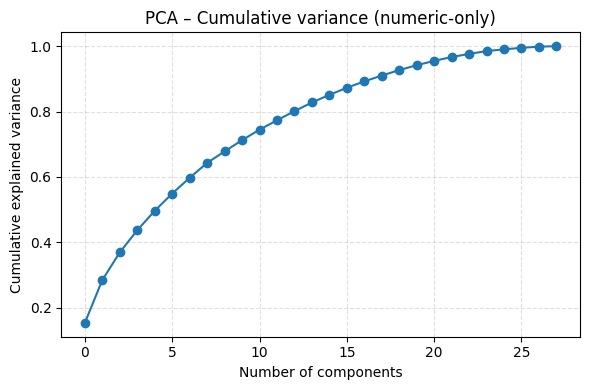

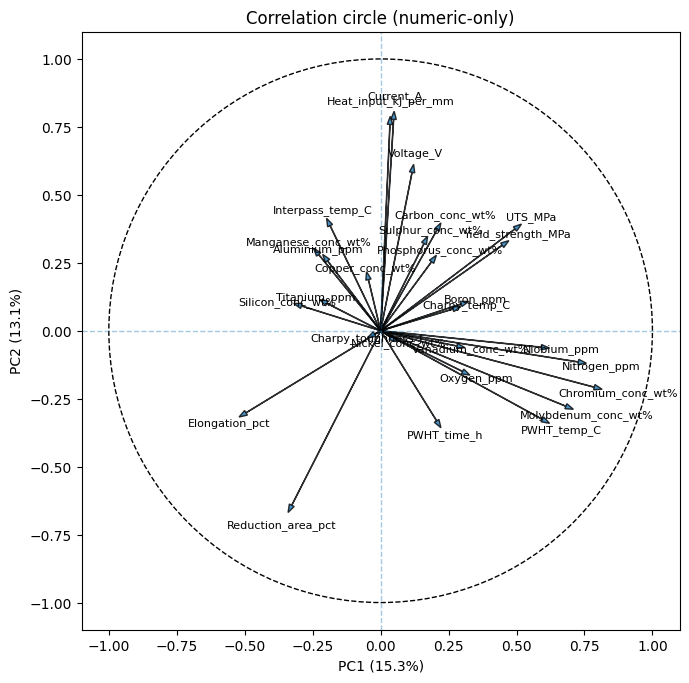

In [50]:

# ---------- CONFIG ----------
include_dummies = False   # set to True to keep one-hot dummies in PCA
dummy_prefixes = ("AC_DC_", "Polarity_", "Weld_type_")  # adjust if needed

# ---------- 1) Select numeric-only features ----------
num_cols_all = df_clean_imputed.select_dtypes(include="number").columns.tolist()

if include_dummies:
    feat_cols = num_cols_all
else:
    # drop obvious one-hot columns by prefix
    feat_cols = [c for c in num_cols_all if not c.startswith(dummy_prefixes)]

X_num = df_clean_imputed[feat_cols].copy()


# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# PCA 
pca = PCA()
scores = pca.fit_transform(X_scaled)          # scores = individuals in PC space
expl = pca.explained_variance_ratio_

# Variance curve
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(expl), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA – Cumulative variance (numeric-only)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#  Correlation circle (PC1–PC2) 
# Loadings (variable–PC correlations) for standardized data:
# loadings = components_.T * sqrt(explained_variance_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(figsize=(7,7))
# unit circle
circle = plt.Circle((0,0), 1, fill=False, linestyle="--", linewidth=1)
ax.add_artist(circle)

# arrows + labels
names = X_num.columns.tolist()
for i, name in enumerate(names):
    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, x, y, head_width=0.02, head_length=0.03, alpha=0.8, length_includes_head=True)
    ax.text(1.07*x, 1.07*y, name, fontsize=8, ha="center", va="center")

ax.axhline(0, linestyle="--", linewidth=1, alpha=0.4)
ax.axvline(0, linestyle="--", linewidth=1, alpha=0.4)
ax.set_aspect("equal", "box")
ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(f"PC1 ({expl[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({expl[1]*100:.1f}%)")
ax.set_title("Correlation circle (numeric-only)")
plt.tight_layout()
plt.show()


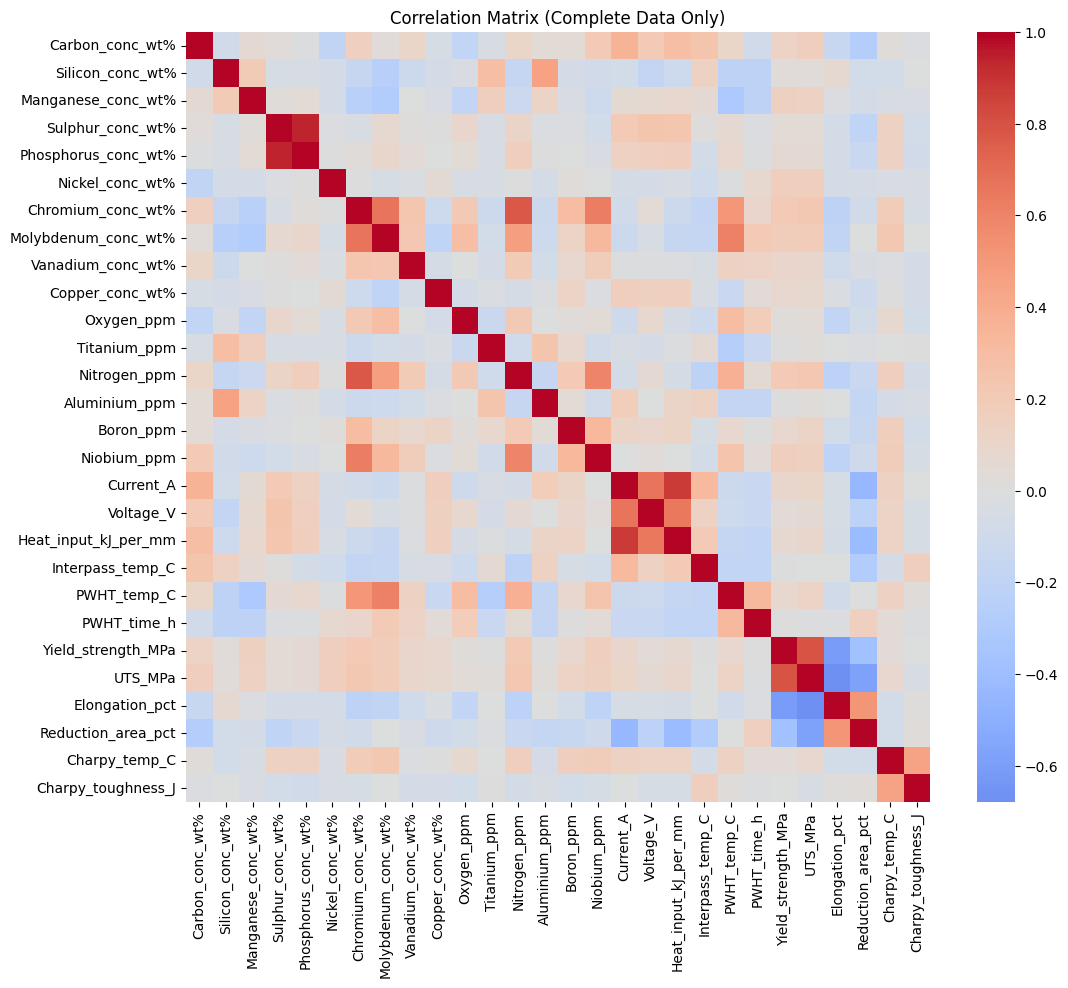

In [51]:
corr = X_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Complete Data Only)")
plt.show()
